## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
data.columns

Index(['x', 'y', 'z', 'x*x', '2*y', '2*z+3*x*x', 'w', 'target'], dtype='object')

In [5]:
features = data.columns[:-1]
print(features)

Index(['x', 'y', 'z', 'x*x', '2*y', '2*z+3*x*x', 'w'], dtype='object')


In [6]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [7]:
X.shape

(100, 7)

In [8]:
np.unique(Y)

array([0, 1], dtype=int64)

In [9]:
X.ndim

2

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

**1. Finding the Correlation between the features**

<AxesSubplot:>

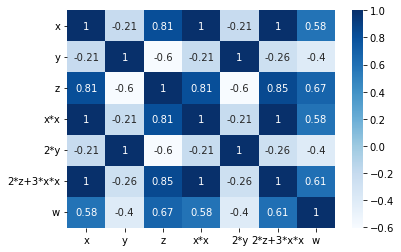

In [10]:
# 1. Correlation (heat Map)

# a. check the correlation between the features
XData = data.drop(['target'], axis=1)

# b. plot heat map of correlation matrix using seaborn heatmap
sns.heatmap(XData.corr(), cmap="Blues", annot=True)

### Logistic Regression

**2. Finding the best model (ie Hyper-Param ) for the given data**

In [12]:
# CV - Cross Validation (Training Phase - Hyper-Param Decision Time) (Model)

# ref : https://www.kaggle.com/enespolat/grid-search-with-logistic-regression

#from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Train test Split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

# C is regularization term
params={"C":np.logspace(-3,3,10)} # range(10**-3 : 10**3, 10)
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg, params, cv=10)  # (Train-Test) Splitting Strategy = 10 Fold (ie Internal)

logreg_cv.fit(x_train,y_train)
logreg_best_param_C = logreg_cv.best_params_['C']

print("tuned hpyerparameters :(C) ",logreg_best_param_C)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(C)  0.004641588833612777
accuracy : 1.0


In [13]:
# Target Variables Y := (Unique vals)
logreg_cv.classes_

array([0, 1], dtype=int64)

In [18]:
# Candidate params := Params (used whilst training)
cand_params = logreg_cv.cv_results_['params']
cand_params

[{'C': 0.001},
 {'C': 0.004641588833612777},
 {'C': 0.021544346900318832},
 {'C': 0.1},
 {'C': 0.46415888336127775},
 {'C': 2.154434690031882},
 {'C': 10.0},
 {'C': 46.41588833612773},
 {'C': 215.44346900318823},
 {'C': 1000.0}]

In [19]:
# Best Params Value position for param := 'C'
selected_param_idx = logreg_cv.best_index_
selected_param_idx, cand_params[selected_param_idx]

(1, {'C': 0.004641588833612777})

In [20]:
# Total features that were accounted whilst doing this Grid Search (for Logistic Regression)
feat_cnt = logreg_cv.n_features_in_
print(feat_cnt)

7


**3. Getting Weights with Original Data**

In [21]:
# Best Model (Weights + Score)
best_model = LogisticRegression(C=logreg_best_param_C)
# Train
best_model.fit(x_train,y_train)
# Test (CV) -> Accuracy
best_score = best_model.score(x_test, y_test)

# Weight
best_weight = best_model.coef_.ravel()

print("Best Score ", best_score)
print("Best Weights ", best_weight)

Best Score  1.0
Best Weights  [ 0.0831106  -0.08739952  0.11976474  0.08098865 -0.08739952  0.08734999
  0.07534088]


**4. Modifying the Original Data**

In [22]:
# 4. Modifying the Original Data
noise = 10**-2
X_m = X + noise

# Train test Split
x_train, x_test, y_train, y_test=train_test_split(X_m,Y,test_size=0.3)

# Train
best_model.fit(x_train,y_train)

# Test (CV) -> Accuracy
best_score_edited = best_model.score(x_test, y_test)

# ! NOTE :- You need to ravel/flatten ie convert the nd-array into single dimen array just like List to work efficiently late
# Weight
best_weight_edited = best_model.coef_.ravel()

print("Best Score ", best_score_edited)
print("Best Weights ", best_weight_edited)

Best Score  1.0
Best Weights  [ 0.0873578  -0.08296713  0.12143508  0.08634661 -0.08296713  0.09237386
  0.07136226]


> ! NOTE :- You need to ravel/flatten ie convert the nd-array into single dimen array just like List to work efficiently late

In [24]:
# Adding Noise (ie Matrix + Scaler) // Sample Check 
a = np.array([[1,2], [3,4]])
a + 4

array([[5, 6],
       [7, 8]])

**5. Checking Deviations in Metrics & Weights**

In [25]:
# 5. Checking Deviations in Metrics & Weights

import heapq

# 1.
diff_score = abs(best_score - best_score_edited)
print('Score Difference :- ', diff_score)

# 2.
diff_weights = np.abs(best_weight - best_weight_edited)
print('Weights Difference :- ', diff_weights)

# 3.
diff_weights_percent = diff_weights / best_weight
print('Diff Weight Percent :- ', diff_weights_percent)
largest_idxs = heapq.nlargest(4, range(len(diff_weights_percent)), diff_weights_percent.__getitem__)
print('Largest Indexes :-', largest_idxs)
top_features = [features[i] for i in largest_idxs]
print('Top 4 features that have higher % change in Weights :- ', top_features)


Score Difference :-  0.0
Weights Difference :-  [0.00424721 0.0044324  0.00167034 0.00535796 0.0044324  0.00502388
 0.00397862]
Diff Weight Percent :-  [ 0.05110306 -0.0507142   0.01394681  0.06615693 -0.0507142   0.05751434
  0.05280819]
Largest Indexes :- [3, 5, 6, 0]
Top 4 features that have higher % change in Weights :-  ['x*x', '2*z+3*x*x', 'w', 'x']


--------------

In [26]:
# def perturbation_test(model, params):
#     '''To check presence of Collinearity'''
#     # Train test Split
#     x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.3)

#     #params={"C":np.logspace(-3,3,10)} # 10
#     model=LogisticRegression()
#     logreg_cv=GridSearchCV(logreg,params,cv=10)  # Splitting Strategy = 10 Fold

#     logreg_cv.fit(x_train,y_train)

#     logreg_best_param_C = logreg_cv.best_params_['C']

#     print("tuned hpyerparameters :(best parameters) ",logreg_best_param_C)
#     print("accuracy :",logreg_cv.best_score_)

### SVM (Linear)

**2. Finding the best model (ie Hyper-Param ) for the given data**

In [35]:
# CV - Cross Validation (Training Phase - Hyper-Param Decision Time) (Model)

# ref : https://www.kaggle.com/enespolat/grid-search-with-logistic-regression

#from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Train test Split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

# C is regularization term
params={"C":np.logspace(-3,3,10)} # range(10**-3 : 10**3, 10)
model=SVC(kernel='linear')
model_cv=GridSearchCV(model, params, cv=10)  # (Train-Test) Splitting Strategy = 10 Fold (ie Internal)

model_cv.fit(x_train,y_train)
best_param_C = model_cv.best_params_['C']

print("tuned hpyerparameters :(C) ",best_param_C)
print("accuracy :",model_cv.best_score_)

tuned hpyerparameters :(C)  0.004641588833612777
accuracy : 1.0


In [36]:
# Target Variables Y := (Unique vals)
model_cv.classes_

array([0, 1], dtype=int64)

In [37]:
# Candidate params := Params (used whilst training)
cand_params = model_cv.cv_results_['params']
cand_params

[{'C': 0.001},
 {'C': 0.004641588833612777},
 {'C': 0.021544346900318832},
 {'C': 0.1},
 {'C': 0.46415888336127775},
 {'C': 2.154434690031882},
 {'C': 10.0},
 {'C': 46.41588833612773},
 {'C': 215.44346900318823},
 {'C': 1000.0}]

In [38]:
# Best Params Value position for param := 'C'
selected_param_idx = model_cv.best_index_
selected_param_idx, cand_params[selected_param_idx]

(1, {'C': 0.004641588833612777})

In [39]:
# Total features that were accounted whilst doing this Grid Search (for Logistic Regression)
feat_cnt = model_cv.n_features_in_
print(feat_cnt)

7


**3. Getting Weights with Original Data**

In [40]:
# Best Model (Weights + Score)
best_model = SVC(C=best_param_C, kernel='linear')
# Train
best_model.fit(x_train,y_train)
# Test (CV) -> Accuracy
best_score = best_model.score(x_test, y_test)

# Weight
best_weight = best_model.coef_.ravel()

print("Best Score ", best_score)
print("Best Weights ", best_weight)

Best Score  1.0
Best Weights  [ 0.14219866 -0.13512138  0.23301992  0.1383527  -0.13512138  0.15265171
  0.10999079]


**4. Modifying the Original Data**

In [41]:
# 4. Modifying the Original Data
noise = 10**-2
X_m = X + noise

# Train test Split
x_train, x_test, y_train, y_test=train_test_split(X_m,Y,test_size=0.3)

# Train
best_model.fit(x_train,y_train)

# Test (CV) -> Accuracy
best_score_edited = best_model.score(x_test, y_test)

# ! NOTE :- You need to ravel/flatten ie convert the nd-array into single dimen array just like List to work efficiently late
# Weight
best_weight_edited = best_model.coef_.ravel()

print("Best Score ", best_score_edited)
print("Best Weights ", best_weight_edited)

Best Score  1.0
Best Weights  [ 0.12074683 -0.16857629  0.22225544  0.11542463 -0.16857629  0.13071661
  0.13800882]


> ! NOTE :- You need to ravel/flatten ie convert the nd-array into single dimen array just like List to work efficiently late

**5. Checking Deviations in Metrics & Weights**

In [42]:
# 5. Checking Deviations in Metrics & Weights

import heapq

# 1.
diff_score = abs(best_score - best_score_edited)
print('Score Difference :- ', diff_score)

# 2.
diff_weights = np.abs(best_weight - best_weight_edited)
print('Weights Difference :- ', diff_weights)

# 3.
diff_weights_percent = diff_weights / best_weight
print('Diff Weight Percent :- ', diff_weights_percent)
largest_idxs = heapq.nlargest(4, range(len(diff_weights_percent)), diff_weights_percent.__getitem__)
print('Largest Indexes :-', largest_idxs)
top_features = [features[i] for i in largest_idxs]
print('Top 4 features that have higher % change in Weights :- ', top_features)


Score Difference :-  0.0
Weights Difference :-  [0.02145183 0.0334549  0.01076448 0.02292808 0.0334549  0.0219351
 0.02801804]
Diff Weight Percent :-  [ 0.15085816 -0.24759148  0.04619553  0.16572194 -0.24759148  0.14369378
  0.25473077]
Largest Indexes :- [6, 3, 0, 5]
Top 4 features that have higher % change in Weights :-  ['w', 'x*x', 'x', '2*z+3*x*x']


### Observations

Logistic Regression helps to spot out the correlated feature via perturbation test, more nearly compare to SVM(linear) 
because the top most feature deviated in case of Logistic Regression is `x*x` while for SVM is `w`
<br> Now
`x*x` is highly correlated to `x`, clearly